## Support Vector Classifier
In this notebook, we will visualize different hyperparameters of svm.

In [21]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')


In [22]:
# loading the dataset
iris = datasets.load_iris()

In [23]:
# getting independent and dependent variables
# we are only taking the first two features(sepal_length, sepal_width)
X = iris.data[:,:2]

y = iris.target

## Visualizing classification regions

The purpose of meshgrid is to create  rectangular grid of an array x values and an array of y values   

In [24]:
## create a mesh grid to show the classification region

# defining limit for x axis
x_min, x_max = X[:,0].min() - 1 , X[:,0].max() + 1 

# defining limit for y axis
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

# 0.01 step size with respect to x limit
h = (x_max / x_min)/100

# defining the meshgrid with above parameters
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))


## Ploting the Regions

### Default SVC

In [25]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### plotting

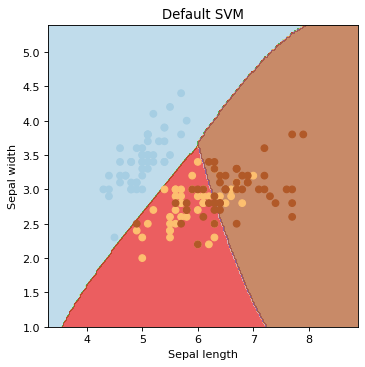

In [26]:
plt.figure(figsize = (5,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Paired, alpha=0.7)

plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Default SVM')
plt.show()

### Linear SVM

In [27]:
svc = SVC(kernel = 'linear')
svc.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

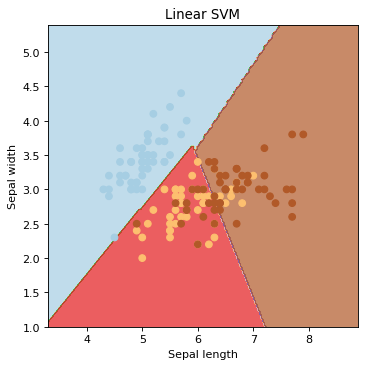

In [28]:
plt.figure(figsize = (5,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Linear SVM')
plt.show()

### SVM with polynomial kernel

In [29]:
svc = SVC(kernel='poly')
svc.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

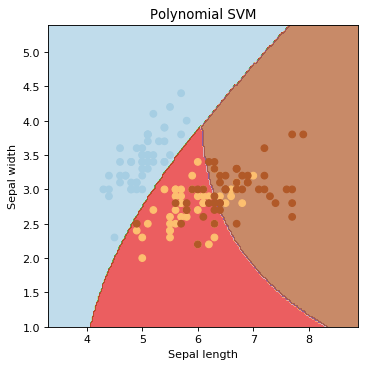

In [30]:
plt.figure(figsize = (5,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Polynomial SVM')
plt.show()

### Polynomial SVM with different degrees

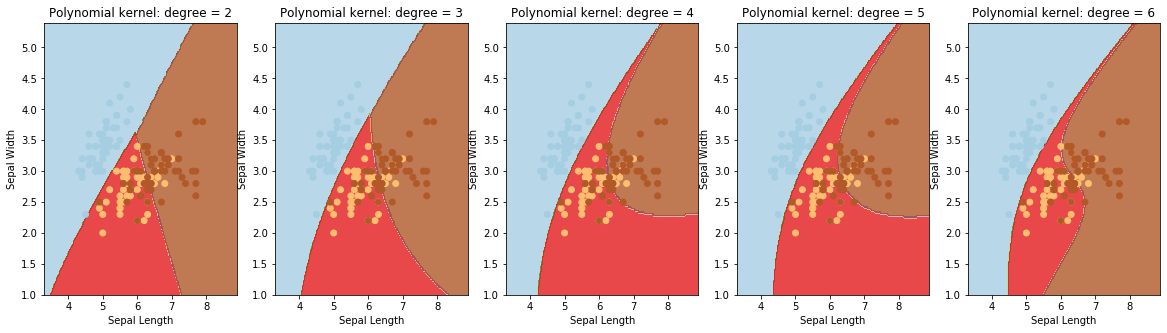

In [38]:
plt.figure(figsize = (20,5))

for i in range(2,7):
    svc = SVC(kernel = 'poly', degree = i)
    svc.fit(X,y)
    
    plt.subplot(1,5,i-1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    
    plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(),xx.max())
    plt.title('Polynomial kernel: degree = '+str(i))
    
plt.show()

### SVM with rbf or gaussian kernel

In [39]:
svc = SVC(kernel = 'rbf')
svc.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

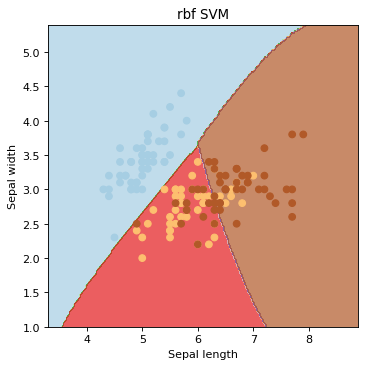

In [40]:
plt.figure(figsize = (5,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('rbf SVM')
plt.show()

The parameters that govern the performance of rbf are the parameteres 'C' which is the regularisation parameter and "GAMMA" which is the distance of margin of the classifier. 

### Change with respect to gamma ( C = constant)

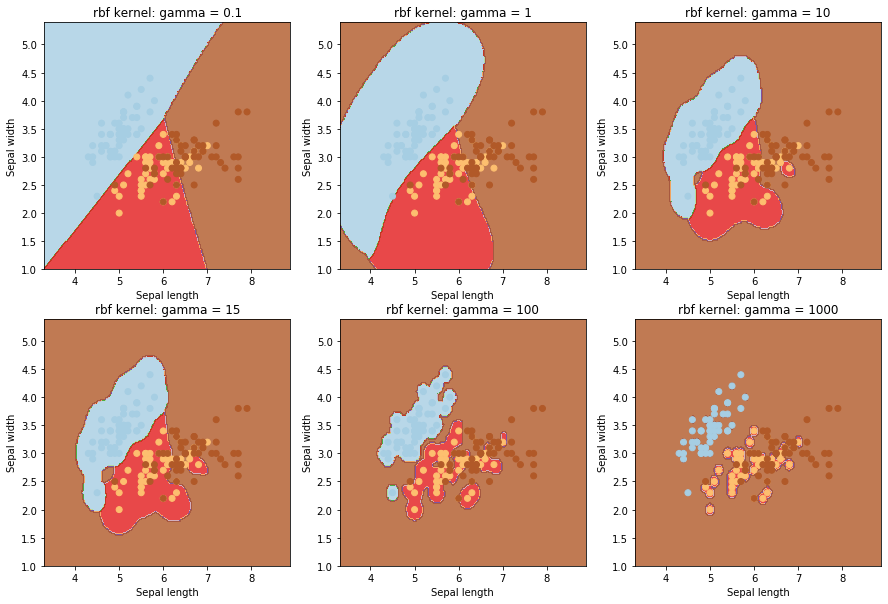

In [41]:
plt.figure(figsize = (15,10))

g = [0.1, 1, 10, 15, 100, 1000]

for i in range(len(g)):
    svc = SVC(kernel='rbf', gamma = g[i])
    svc.fit(X,y)
    
    plt.subplot(2,3,i+1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.8)
    
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title('rbf kernel: gamma = '+str(g[i]))
    
plt.show()

We can clearly see that taking a very small value of Gamma in SVC is similar to using the linear SVC, but as we increase the Value of the gamma , the classification process improves but starts to over fit if we take a very hight value of the GAMMA.

The important thing to note is the nature of overfitting when Gamma is 1000, each and everypoint is correctly classified and is almost perfectly isolated in circular classification curves.

### Change with respect to C ( gamma = constant)


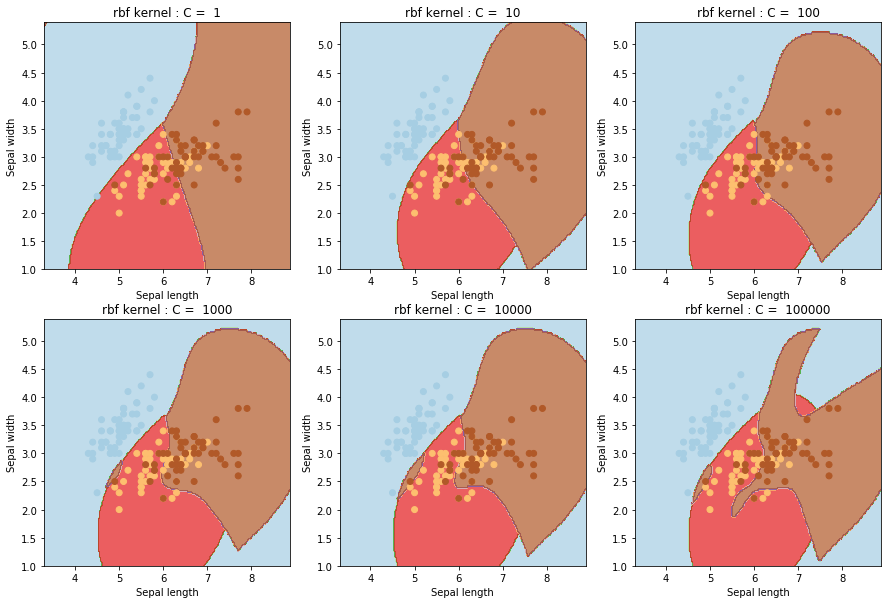

In [45]:
plt.figure(figsize=(15,10))

c = [1,10,100,1000,10000,100000]

for i in range(len(c)):
    svc = SVC(kernel='rbf', C=c[i], gamma = 0.5)
    svc.fit(X,y)
    
    plt.subplot(2,3,i+1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)
    
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title("rbf kernel : C =  "+str(c[i]))
    
plt.show()

Hyperparameter c is trying to shrink the boundaries